In [41]:


########################### Input ###########################
#     If [Attr] is [Cond], then distribution by [Data] is   #
#############################################################
Attr = "INSURANCE"
Cond = "Government"
Data = "AGE"
########################### Input ###########################


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
### merges ###
tables = {"ser": "SERVICES.csv", "pat": "PATIENTS.csv", "stay": "ICUSTAYS.csv", "adm": "ADMISSIONS.csv"}

#admissions
df = pd.read_csv("mimic/"+tables["adm"])
df = df[["SUBJECT_ID", "HADM_ID", "ADMITTIME", "ADMISSION_TYPE", "INSURANCE", "MARITAL_STATUS", "ETHNICITY", "DIAGNOSIS", "HOSPITAL_EXPIRE_FLAG"]]

#patients
df1 = pd.read_csv("mimic/"+tables["pat"])
df1 = df1[["SUBJECT_ID", "GENDER", "DOB"]]

df = df.merge(df1, how="left")
df = df.dropna()

df["ADMITTIME"] = pd.to_datetime(df["ADMITTIME"]).map(lambda x: x.year)
df["DOB"] = pd.to_datetime(df["DOB"]).map(lambda x: x.year)
df["AGE"] = df["ADMITTIME"] - df["DOB"]
df = df[df["AGE"] < 130]
df = df.drop(['DOB', 'ADMITTIME'], axis=1)

df = df[df["DIAGNOSIS"].str.contains("(CONGESTIVE HEART FAILURE)|(ATRIAL FIBRILLATION)")]


#services
df1 = pd.read_csv("mimic/"+tables["ser"])
df1 = df1[["SUBJECT_ID", "HADM_ID", "PREV_SERVICE", "CURR_SERVICE"]]

df = df.merge(df1, how="left")

df["PREV_SERVICE"] = df["PREV_SERVICE"].apply(lambda x: x if x == "CMED" or x == "CSURG" else np.NaN)
df["CURR_SERVICE"] = df["CURR_SERVICE"].apply(lambda x: x if x == "CMED" or x == "CSURG" else np.NaN)

df = df.drop(["SUBJECT_ID", "HADM_ID"], axis=1)




In [16]:

norm_df = df["HOSPITAL_EXPIRE_FLAG"].to_frame()

def creNormNum(st):
    norm_df[st] = (df[st] - df[st].mean()) / (df[st].max() - df[st].min())

def creCat(st):
    vals = df[st].unique()
    
    for val in vals:
        if(val == val):
            norm_df[st + "--" + str(val)] = df[st].apply(lambda x: 1 if x == val else 0)


norm_df["GENDER"] = df["GENDER"].apply(lambda x: 1 if x == 'M' else -1)

creCat("ADMISSION_TYPE")
creCat("INSURANCE")
creCat("MARITAL_STATUS")
creNormNum("AGE")
creCat("ETHNICITY")

norm_df["DIAGNOSIS"] = df["DIAGNOSIS"].apply(lambda x: 1 if "CONGESTIVE HEART FAILURE" in x else -1)

creCat("PREV_SERVICE")
creCat("CURR_SERVICE")

norm_df["DEAD"] = df["HOSPITAL_EXPIRE_FLAG"]
norm_df = norm_df.drop(["HOSPITAL_EXPIRE_FLAG"], axis=1)


In [17]:
df["MARITAL_STATUS"].unique()

array(['MARRIED', 'SEPARATED', 'WIDOWED', 'SINGLE', 'DIVORCED',
       'UNKNOWN (DEFAULT)', 'LIFE PARTNER'], dtype=object)

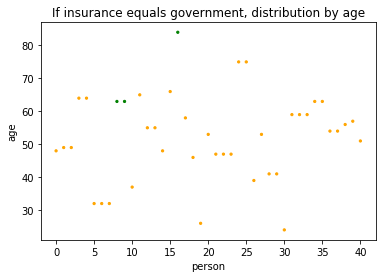

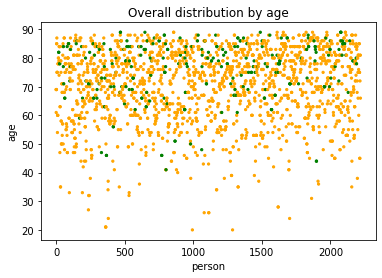

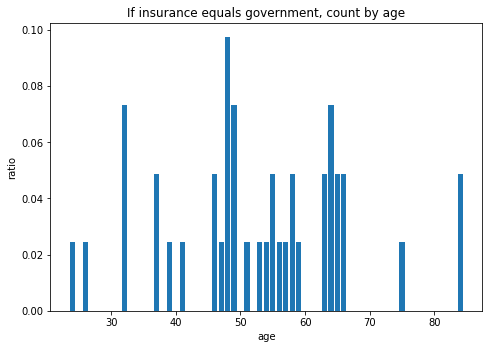

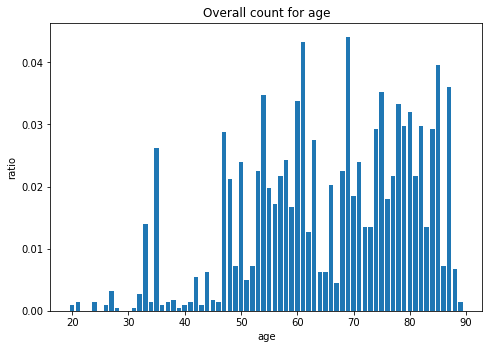

In [42]:

toplot = df[df[Attr] == Cond][Data]
cols = ['orange' if i == 0 else 'green' for i in norm_df[df[Attr] == Cond]["DEAD"]]

plt.scatter(range(len(toplot)), toplot, s=5, c=cols);
plt.title("If " + Attr.lower() + " equals " + Cond.lower() + ", distribution by " + Data.lower())
plt.ylabel(Data.lower())
plt.xlabel('person')
#plt.legend(['survived', 'not survived'], loc='lower right')
plt.show()

cols = ['orange' if i == 0 else 'green' for i in norm_df["DEAD"]]
plt.scatter(range(len(df[Data])), df[Data], s=5, c=cols);
plt.title("Overall distribution by " + Data.lower())
plt.ylabel(Data.lower())
plt.xlabel('person')
#plt.legend(['survived', 'not survived'], loc='lower right')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(toplot.unique())
students = list(toplot.value_counts(normalize=True))
ax.bar(langs,students)

plt.title("If " + Attr.lower() + " equals " + Cond.lower() + ", count by " + Data.lower())
plt.ylabel("ratio")
plt.xlabel(Data.lower())
#plt.legend(['survived', 'not survived'], loc='lower right')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(df[Data].unique())
students = list(df[Data].value_counts(normalize=True))
ax.bar(langs,students)

plt.title("Overall count for " + Data.lower())
plt.ylabel("ratio")
plt.xlabel(Data.lower())
#plt.legend(['survived', 'not survived'], loc='lower right')
plt.show()
